# Symbolic Regression (via Evolutionary Strategy)
In this first tutorial we will make use of a classic Evolutionary to evolve a model for our input data.

In [1]:
# Some necessary imports.
import dcgpy
import pygmo as pg
from matplotlib import pyplot as plt
%matplotlib notebook

### 1 - The data

In [4]:
# We load our data from some available ones shipped with dcgpy.
# In this particular case we use the problem chwirut2 from 
# (https://www.itl.nist.gov/div898/strd/nls/data/chwirut2.shtml)
X, Y = dcgpy.generate_chwirut2()


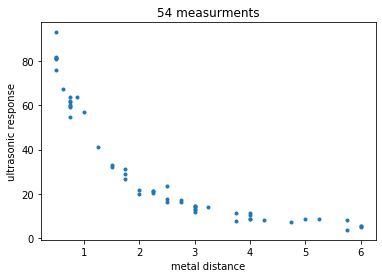

In [5]:
# And we plot them as to visualize the problem.
_ = plt.plot(X, Y, '.')
_ = plt.title('54 measurments')
_ = plt.xlabel('metal distance')
_ = plt.ylabel('ultrasonic response')




### 2 - The symbolic regression problem

In [13]:
# We define our kernel set, that is the mathematical operators we will
# want our final model to possibly contain. What to choose in here is left
# to the competence and knowledge of the user. A list of kernels shipped with dcgpy 
# can be found on the online docs. The user can also define its own kernels (see the corresponding tutorial).
ss = dcgpy.kernel_set_double(["sum", "diff", "mul", "pdiv"])

In [10]:
# We instantiate the symbolic regression optimization problem (note: many important options are here not
# specified and thus set to their default values)
udp = dcgpy.symbolic_regression(points = X, labels = Y, kernels=ss())
print(udp)

	Data dimension (points): 1
	Data dimension (labels): 1
	Data size: 54
	Kernels: [sum, diff, mul, pdiv]



### 3 - The search algorithm

In [41]:
# We instantiate here the evolutionary strategy we want to use to search for models.
uda  = dcgpy.es4cgp(gen = 10000, mut_n = 2)

In [42]:
prob = pg.problem(udp)
algo = pg.algorithm(uda)
algo.set_verbosity(10)
pop = pg.population(prob, 4)

In [43]:
pop = algo.evolve(pop)

In [46]:
udp.prettier(pop.champion_x)

'[1 + 2*x0 - (-4 + x0)*(1 - (-4 + x0))**2 - (-4 + x0)]'